# Advent of Code 2020

___

[**Day 1**](#day1) &nbsp; &nbsp; &nbsp; [**Day 2**](#day2) &nbsp; &nbsp; &nbsp; [**Day 3**](#day3) &nbsp; &nbsp; &nbsp; [**Day 4**](#day4) &nbsp; &nbsp; &nbsp; [**Day 5**](#day5)

[**Day 6**](#day6) &nbsp; &nbsp; &nbsp; [**Day 7**](#day7) &nbsp; &nbsp; &nbsp; [**Day 8**](#day8) &nbsp; &nbsp; &nbsp; [**Day 9**](#day9) &nbsp; &nbsp; &nbsp; [**Day 10**](#day10)

[**Day 11**](#day11) &nbsp; &nbsp; [**Day 12**](#day12) &nbsp; &nbsp; [*Day 13*](#day13) &nbsp; &nbsp; [**Day 14**](#day14) &nbsp; &nbsp; [**Day 15**](#day15)

[**Day 16**](#day16) &nbsp; &nbsp; [Day 17](#day17) &nbsp; &nbsp; [Day 18](#day18) &nbsp; &nbsp; [Day 19](#day19) &nbsp; &nbsp; [Day 20](#day20)

[Day 21](#day21) &nbsp; &nbsp; [Day 22](#day22) &nbsp; &nbsp; [Day 23](#day23) &nbsp; &nbsp; [Day 24](#day24) &nbsp; &nbsp; [Day 25](#day25)

___

<a class="anchor" id="day1"></a>
# Day 1

In [1]:
with open('data2020/day1.txt') as f1:
    exp_report = [int(row.strip()) for row in f1.readlines()]
    
exp_report[-5:]

[1742, 1319, 1882, 951, 1849]

**Part 1**

In [2]:
for i, exp1 in enumerate(exp_report):
    for j, exp2 in enumerate(exp_report[i:]):
        if exp1 + exp2 == 2020:
            print(exp1*exp2)

41979


**Part 2**

In [3]:
for i, exp1 in enumerate(exp_report):
    for j, exp2 in enumerate(exp_report[i:]):
        for k, exp3 in enumerate(exp_report[i+j:]):
            if exp1 + exp2 + exp3 == 2020:
                print(exp1*exp2*exp3)

193416912


*code golf - one line each for read/parse, part1, part2*

In [3]:
import itertools
data = list(map(int, open('data2020/day1.txt').read().splitlines()))
d1p1 = (lambda x:x[0]*x[1])([pair for pair in list(itertools.combinations(data, 2)) if pair[0] + pair[1] == 2020][0])
d1p2 = (lambda x:x[0]*x[1]*x[2])([pair for pair in list(itertools.combinations(data, 3)) if pair[0] + pair[1] + pair[2] == 2020][0])
d1p1, d1p2

(41979, 193416912)

<a class="anchor" id="day2"></a>

# Day 2

*Part 1*  
How many of the passwords contain the letter in the given range? Example:
  
    1-2 x: xpxc
    
This asks "does the password xpxc contain an x somewhere between the first and second slot?"

*Part 2*  
Instead, find the passwords that have the desired letter at exactly the lower bound or upper bound but not both.

In [4]:
with open('data2020/day2.txt') as f2:
    pwlist = [row.strip() for row in f2.readlines()]

pwlist[:5]

['1-2 x: xpxc',
 '1-5 b: bwlbbbbcq',
 '3-5 v: qvjjdhvl',
 '9-12 t: ttfjvvtgxtctrntnhtt',
 '3-4 r: rqjw']

**Part 1**

In [5]:
count = 0
for row in pwlist:
    row = row.split(' ')
    span, char, pw = row
    lower, upper = map(int, span.split('-'))
    char = char[0]
    if lower <= pw.count(char) <= upper:
        count += 1
count    

556

**Part 2**

In [6]:
count = 0
for row in pwlist:
    row = row.split(' ')
    span, char, pw = row
    lower, upper = map(int, span.split('-'))
    char = char[0]
    if (pw[lower-1] == char and pw[upper-1] != char) or (pw[lower-1] != char and pw[upper-1] == char):
        count += 1
count    

605

<a class="anchor" id="day3"></a>
# Day 3

Skiing through the trees!
Starting from top left and going to the bottom row, with the grid repeating horzontally:

*Part 1*  
How many trees will you hit with a slope of right 3, down 1?

*Part 2*  
Find number of trees hit for 5 different slopes, find their product.

In [7]:
with open('data2020/day3.txt') as f3:
    forest = [row.strip() for row in f3.readlines()]

forest[:5]

['.#..#.....#....##..............',
 '...#.#...#...#.#..........#....',
 '#...###...#.#.....#.##.#.#...#.',
 '#.....#.#...##....#...#...#....',
 '##.......##.#.....#........##.#']

**Part 1**

In [8]:
tree = 0
i, j = 0, 0
while i < len(forest):
    if forest[i][j] == '#':
        tree += 1
    i += 1
    j = (j+3) % len(forest[0])
    
tree

289

**Part 2**

In [9]:
mx = [1, 3, 5, 7, 1]
my = [1, 1, 1, 1, 2]
treeprod = 1
for m in range(5):
    x = mx[m]
    y = my[m]
    tree = 0
    i, j = 0, 0
    while i < len(forest):
        if forest[i][j] == '#':
            tree += 1
        i += y
        j = (j+x) % len(forest[0])
    treeprod *= tree
treeprod

5522401584

<a class="anchor" id="day4"></a>

# Day 4

Checking passports

*Part 1*  
Given is a list of passports.  There are 8 fields, all of which except for *cid* are required.  Determine how many passports have all required fields.

*Part 2*  
Now count passports that both have all fields and all the fields are valid according to these rules:

    byr (Birth Year) - four digits; at least 1920 and at most 2002.
    iyr (Issue Year) - four digits; at least 2010 and at most 2020.
    eyr (Expiration Year) - four digits; at least 2020 and at most 2030.
    hgt (Height) - a number followed by either cm or in:
    If cm, the number must be at least 150 and at most 193.
    If in, the number must be at least 59 and at most 76.
    hcl (Hair Color) - a # followed by exactly six characters 0-9 or a-f.
    ecl (Eye Color) - exactly one of: amb blu brn gry grn hzl oth.
    pid (Passport ID) - a nine-digit number, including leading zeroes.
    cid (Country ID) - ignored, missing or not.

In [12]:
with open('data2020/day4.txt') as f4:
    passports = [row.strip() for row in f4.readlines()]

# when we identify several lines being part of one passport, we'll find the
#  end of a passport by finding '', so put one on the very end
passports.append('')
passports[-5:]

['byr:1991',
 'iyr:1930 eyr:2024',
 '',
 'ecl:oth hcl:#602927 eyr:2025 iyr:2013 hgt:151cm byr:1992 pid:812583062',
 '']

In [15]:
# move lines around so one line = one passport
pps = []
pp = ''
for i, line in enumerate(passports):
    if line == '':
        pps.append(pp)
        pp = ''
    else:
        pp += line + ' '
pps[-3:]

['pid:095687847 eyr:2022 hgt:151cm byr:1967 iyr:2017 ecl:oth hcl:#866857 ',
 'hcl:#866857 pid:983640144 hgt:61cm ecl:hzl byr:1991 iyr:1930 eyr:2024 ',
 'ecl:oth hcl:#602927 eyr:2025 iyr:2013 hgt:151cm byr:1992 pid:812583062 ']

In [16]:
# convert each passport string into its own dict; make a list of passport dicts
ppdList = []
for pp in pps:
    ppd = {}
    pp = pp.split(' ')
    for part in pp:
        if ':' in part:
            k, v = part.split(':')
            ppd[k] = v
    ppdList.append(ppd)
ppdList[0]

{'eyr': '2027',
 'hcl': '#602927',
 'hgt': '186cm',
 'byr': '1939',
 'iyr': '2019',
 'pid': '552194973',
 'ecl': 'hzl'}

In [17]:
# count passports with all requierd fields
features = sorted(['hcl', 'pid', 'hgt', 'ecl', 'byr', 'iyr', 'eyr'])
features2 = sorted(features + ['cid'])
valid = 0
for ppd in ppdList:
    keys = sorted(list(set(ppd.keys())))
    if keys == features or keys == features2:
        valid += 1

valid

235

**Part 2**

In [24]:
def is_valid(ppd):
    
    # check if all required fields are present first (like part 1)
    if not (sorted(ppd.keys()) == features or sorted(ppd.keys()) == features2):
        return 'type 1'
    
    by = int(ppd['byr'])
    if by < 1920 or by > 2002:
        return 'birth year error'
    
    iy = int(ppd['iyr'])
    if iy < 2010 or iy > 2020:
        return 'issue year error'
    
    ey = int(ppd['eyr'])
    if ey < 2020 or ey > 2030:
        return 'exp year error'
    
    hgtstr = ppd['hgt']
    if 'cm' in hgtstr:
        hgt = int(hgtstr[:-2])
        if hgt < 150 or hgt > 193:
            return 'height cm error'
    elif 'in' in hgtstr:
        hgt = int(hgtstr[:-2])
        if hgt < 59 or hgt > 76:
            return 'height in error'
    elif 'cm' not in hgtstr and 'in' not in hgtstr:
        return 'height no units error'
    
    hcl = ppd['hcl']
    if not (hcl[0] == '#' and len(hcl) == 7 and all([char in '0123456789abcdef' for char in list(hcl[1:])])):
        return 'hair color error'
    
    ecl = ppd['ecl']
    if ecl not in ['amb', 'blu', 'brn', 'gry', 'grn', 'hzl', 'oth']:
        return 'eye color error'
    
    pid = ppd['pid']
    if not (len(pid) == 9 and all([char in '0123456789' for char in list(pid)])):
        return 'passport id error'
    
    # 0 is a success here
    return 'valid'


In [25]:
ppchecks = [is_valid(ppd) for ppd in ppdList]
ppchecks[:10]

['valid',
 'valid',
 'passport id error',
 'valid',
 'valid',
 'valid',
 'type 1',
 'issue year error',
 'hair color error',
 'type 1']

In [26]:
ppchecks.count('valid')

194

<a class="anchor" id="day5"></a>

# Day 5

*Part 1*  
Given is a list of bording_passes in binary that are 10 digits long. First 7 indicate which row (1-128), last three indicate which column (1-8).  Seat ID is 8 times row plus column. Find the largest seat ID.

*Part 2*  
Now need to find your seat, the only missing one. However, some seats at the very front and back don't exist on this plane. Identify our seat ID, its the one missing with seats assigned to IDs immediately above and below it.

In [40]:
with open('data2020/day5.txt') as f5:
    boarding_passes = [row.strip() for row in f5.readlines()]
    
boarding_passes[-3:]

['FBBBFFFRLL', 'FBBFBFBRRL', 'FBFFFFFRRL']

**Part 1**

In [41]:
def find_seat(bp):
    bf = bp[:7]
    lr = bp[7:]
    
    bf = bf.replace('B', '1')
    bf = bf.replace('F', '0')
    row = int(bf, 2)
    
    lr = lr.replace('L', '0')
    lr = lr.replace('R', '1')
    col = int(lr, 2)
        
    ID = row*8 + col
    
    return (row, col, ID)

In [42]:
all_seats = [find_seat(bp) for bp in boarding_passes]
max(all_seats, key=lambda x: x[2])

(100, 1, 801)

**Part 2**

In [43]:
check = sorted(allSeats, key=lambda x:x[2])
scores = [x[2] for x in check]
lowScore = check[0][2]
highScore = check[-1][2]
lowScore, highScore

(40, 801)

In [44]:
for i in range(lowScore + 1, highScore):
    if i not in scores and i-1 in scores and i+1 in scores:
        print(i)

597


<a class="anchor" id="day6"></a>

# Day 6

Families are filling out customs declaration forms with 26 questions, a-z.  Letters given are the questions they said "yes" to, one string for each member of each family.

*Part 1*  
Find the questions that *anyone* in the group said yes to - sum those counts across all groups.

*Part 2*  
Find the questions that everyone in the group said yes to - sum those counts across all groups.

In [48]:
with open('data2020/day6.txt') as f6:
    forms = [row.strip() for row in f6.readlines()]
    
forms[-5:]

['rdykiuwbhtzxmvcspnfeojqg', '', 'v', 'v', 'hv']

In [51]:
counts = 0
current = ''
for i, q in enumerate(forms):
    if q == '': # new family - document the old one, start a new one
        counts += len(set(list(current)))
        current = ''
    else: # add on next piece of info
        current += q
counts += len(set(list(current)))
counts

6437

**Part 2**

In [53]:
# can't just mash a whole family's answers together in part one, 
#  need to group each family's responses
groups = []
current = []
for i, q in enumerate(forms):
    if q == '':
        groups.append(current)
        current = []
    else:
        current.append(q)
groups.append(current)

groups[:5]

[['jmqnkzlsfedaptx', 'usjfkadqwmeyilph'],
 ['lodbmhvcaset', 'wcognbeaxhmvdt'],
 ['f', 'f', 'f', 'f'],
 ['dwxfircztpyshol',
  'dogfryaxtlhzscw',
  'gwchdzyftolsxra',
  'thrdwcxfosqzyl',
  'rholzdwctxfsy'],
 ['dbifho', 'zmdh', 'hobd']]

In [54]:
count = 0
for g in groups:
    total = ''.join(g)
    totalunique = ''.join(list(set(list(total))))
    count += len([char for char in totalunique if all([char in person for person in g])])
    
count

3229

<a class="anchor" id="day7"></a>

# Day 7

There are lot of rules about what types of bags must be contained by which bags.

*Part 1*  
Determine how many different colors of bags could contain a shiny gold bag.

*Part 2*  
Determine how many bags must be contained by a shiny gold bag.

In [68]:
with open('data2020/day7.txt') as f7:
    bags = [row.strip() for row in f7.readlines()]
    
bags[-5:]

['faded purple bags contain 1 light fuchsia bag, 4 dull violet bags.',
 'clear plum bags contain 2 vibrant gray bags, 4 striped tan bags.',
 'wavy black bags contain 5 mirrored turquoise bags.',
 'dark coral bags contain 5 faded violet bags.',
 'pale orange bags contain 3 mirrored red bags, 4 clear olive bags.']

In [69]:
# This sample should show an answer of "4 colors of bags" for Part 1 and "shiny gold contains 32 bags" for Part 2.

# sample = ['light red bags contain 1 bright white bag, 2 muted yellow bags.',
# 'dark orange bags contain 3 bright white bags, 4 muted yellow bags.',
# 'bright white bags contain 1 shiny gold bag.',
# 'muted yellow bags contain 2 shiny gold bags, 9 faded blue bags.',
# 'shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags.',
# 'dark olive bags contain 3 faded blue bags, 4 dotted black bags.',
# 'vibrant plum bags contain 5 faded blue bags, 6 dotted black bags.',
# 'faded blue bags contain no other bags.',
# 'dotted black bags contain no other bags.']

# bags = sample

In [70]:
def parseBag(s):
    bag, contains = s.split('contain ')
    
    bag = bag.split(' ')
    bag = ' '.join(bag[:-2])
    
    contains = contains.split(', ')
    inside = []
    for thing in contains:
        sp_thing = thing.split(' ')
        if sp_thing[0] == 'no':
            continue
        count = int(sp_thing[0])
        name = sp_thing[1] + ' ' + sp_thing[2]
        inside.append([count, name])
    
    return (bag, inside)

for bag in bags[:3]:
    print(parseBag(bag))

('posh brown', [[5, 'dim coral'], [1, 'plaid blue'], [2, 'faded bronze'], [2, 'light black']])
('vibrant lime', [[3, 'dull lavender'], [3, 'dim crimson'], [3, 'mirrored lavender'], [2, 'muted cyan']])
('clear olive', [[1, 'wavy gold'], [4, 'dim lime'], [3, 'dull tomato'], [5, 'dark turquoise']])


#### Build dicts to hold three relationships:
1. containments in goodBagDict
2. parent to child is in parentDict
3. child to parent is in childDict

I don't think I actually use parentDict...but I think I "sort of" needed it to make childDict.

In [71]:
goodBags = [parseBag(bag) for bag in bags]
goodBagDict = {k:v for k, v in goodBags}

In [72]:
# Get list of parents and dict where parents are keys
parents = [gb[0] for gb in goodBags]
parentDict= {p:[] for p in parents}
for gb in goodBags:
    for c in gb[1]:
        parentDict[gb[0]].append(c[1])

In [73]:
# Get list of children and dict where children are keys
children = []
for p in parentDict:
    for c in parentDict[p]:
        children.append(c)
children = list(set(children))
childDict = {c:[] for c in children}
for gb in goodBags:
    for c in gb[1]:
        childDict[c[1]].append(gb[0])

In [74]:
allBags = list(set(children + parents))

**Part 1**

In [75]:
toCheck = ['shiny gold']
holdsGold = [0 for i in range(len(allBags))]

while toCheck != []:
    newBags = [] # will hold all of the next layer up
    for bag in toCheck:
        holdsGold[allBags.index(bag)] = 1 # we've seen it now
        if bag in childDict:  # if it has any parents
            pars = childDict[bag]
            for par in pars:
                if holdsGold[allBags.index(par)] == 0: # and if those parents haven't been seen
                    newBags.append(par) # put the parent into the next round
    toCheck += newBags # add in the new bags
    for bag in toCheck: # remove anything we've already seen
        if holdsGold[allBags.index(bag)] == 1:
            toCheck.remove(bag)
            
# holdsGold will have a "1" for shiny gold, but it doesn't contain itself
sum(holdsGold) - 1

238

**Part 2**

In [76]:
def get_contains(bag):
    kids = goodBagDict[bag]
    total = 0
    if kids == []:
        return 0
    for kid in kids:
        total += kid[0]*(get_contains(kid[1]) + 1)
    return total

In [77]:
get_contains('shiny gold')

82930

<a class="anchor" id="day8"></a>

# Day 8

Some code is stuck in an infinite loop.
It consists of 3 instructions with arguments.

    Examples:

    nop +0      # does nothing, executes next line (arg doesn't matter)
    jmp +7      # moves to the instruction 7 lines later (jmp +1 == nop +0)
    acc +4      # increases a global variable by 4 (accumulator, which starts at 0)
    
*Part 1*  
The program is stuck in an infinite loop. Determine the value of the accumulator as the program is about to run a line of the code for a second time.

*Part 2*  
The code is supposed to terminate by attempting to run the line of code immediately past the final line. Its been determined that the error is caused either by a jmp instruction being a nop or vice versa. Find the line with the incorrect jmp/nop; determine the value of the accumulator when the fixed program terminates.

In [78]:
with open('data2020/day8.txt') as f8:
    program = [row.strip() for row in f8.readlines()]
    
program[-5:]

['acc +50', 'acc +16', 'nop -119', 'acc +46', 'jmp +1']

**Part 1**

In [79]:
seen = [0 for i in range(len(program))]  # which lines of code we've seen 
acc = 0

i = 0
while True:
    opp, arg = program[i].split()
    arg = int(arg)
    if opp == 'nop':
        i += 1
    elif opp == 'acc':
        acc += arg
        i += 1
    elif opp == 'jmp':
        i += arg
    if seen[i] == 1:
        break
    else:
        seen[i] = 1
        
acc

1928

**Part 2**

In [80]:
def checkProg(prog):
    seen = [0 for i in range(len(prog))]
    acc = 0
    i = 0
    while True:
        opp, arg = prog[i].split(' ')
        arg = int(arg)
        
        if opp == 'nop':
            i += 1
        elif opp == 'acc':
            acc += arg
            i += 1
        elif opp == 'jmp':
            i += arg

        if i == len(prog):
            return acc
        elif seen[i] == 1:
            return -99
        elif seen[i] == 0:
            seen[i] = 1

In [81]:
for i, row in enumerate(program):
    op = row[:3]
    if op == 'acc':
        continue
    else:
        newProg = program[:]
        newProg[i] = 'jmp ' + row[4:] if op == 'nop' else 'nop ' + row[4:]    # swap ops
    result = checkProg(newProg)
    if result != -99:
        print(result)
        break

1319


<a class="anchor" id="day9"></a>

# Day 9

A list of numbers *almost* has the property that every number in the list can be made by a sum of some pair of numbers in the previous 25 numbers in the list (starting at the 26th number).  

*Part 1*  
Find the first number that cannot be made with the sum of two numbers in the previous 25.

*Part 2*  
The 'wrong' number (answer) from Part 1 can't be made as a sum of any of the previous 25, but it can be made as a sum of several values in a continuous span somewhere in the list (i.e. the 4th through the 12th add to that value, the 90th).

Find the span - find the sum of the smallest and largest values in the span that sum to the Part 1 solution.

We'll use the inchworm method to slide the window over which we're summing:

1. increase the high until we go over x
2. increase the low (decrease the sum) until we are under x

In [85]:
with open('data2020/day9.txt') as f9:
    vals = list(map(int, f9.read().splitlines()))
    
vals[:3], vals[-3:]

([30, 17, 44], [52398572893382, 54392776957308, 59213187032307])

In [86]:
import itertools
x = [1, 2, 3, 4]
list(itertools.combinations(x, 2))

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

**Part 1**

In [87]:
i = 25
while i < len(vals):
    pre = vals[i-25:i]
    x = vals[i]
    if all([sum(pair) != x for pair in list(itertools.combinations(pre, 2))]):
        break
    i += 1
x

400480901

**Part 2**

In [88]:
x = 400480901
low, high = 0, 1
total = sum(vals[low:high+1])

while total != x:
    if total < x:
        high += 1
        total = sum(vals[low:high+1])
    elif total > x:
        while total > x:
            low += 1
            total = sum(vals[low:high+1])
            
min(vals[low:high]) + max(vals[low:high])

67587168

<a class="anchor" id="day10"></a>

# Day 10

Lots of voltage adapters.

*Part 1*  
Using all of the adapters, how many 1 jumps and how many 3 jumps? Find the product of their counts.

*Part 2*  
How many possible ways can we connect the wall to the built-in adapter? Over a trillion, recursion won't work.

Basically it seems like part 1 was to point out that all the differences are 1 or 3 between two consecutive numbers; if the diff is three then there's only one choice, so we really just need to look at the chunks where there are several values in a row that are 1 apart.

In [91]:
with open('data2020/day10.txt') as f10:
    adapters = list(map(int, f10.read().splitlines()))
    
adapters[-4:]

[168, 157, 27, 72]

**Part 1**

In [92]:
ordered = sorted(adapters)
ordered = [0] + ordered + [ordered[-1]+3]  # wall (0) and built-in adapter (3 more than biggest)

diffs = [ordered[i+1] - ordered[i] for i in range(len(ordered)-1)]

diffs.count(1)*diffs.count(3)

2450

**Part 2**

Okay, let's take a look at possible arrangements for $n$ consecutive integers:

    1                 : 1 arrangement
   
    1 2               : 1 arrangement
    
    1 2 3             : 2 arrangements
    1   3
    
    1 2 3 4           : 4 arrangements
    1   3 4
    1 2   4 
    1     4
    
    1 2 3 4 5         : 7 arrangements
    1 2 3   5
    1 2   4 5
    1   3 4 5
    1 2     5
    1   3   5
    1     4 5
    
    1 2 3 4 5 6       : 13 arrangements
    1   3 4 5 6
    1 2   4 5 6
    1 2 3   5 6
    1 2 3 4   6
    1     4 5 6
    1 2     5 6
    1 2 3     6
    1   3   5 6
    1 2   4   6
    1 2     5 6
    1   3     6
    1     4   6
    
From this we can see that if you have $n$ consecutive adjacent integers, then there are $tribonacci(n)$ ways to select them ensuring there is no gap bigger than 3:

       n    :  1   2   3   4   5   6   7   8   9
    trib(n) :  1   1   2   4   7   13  24  44  81

In [95]:
# make some trib numbers
trib = [1, 1, 2]
for i in range(40):
    trib.append(sum(trib[-3:]))
trib[:15]

[1, 1, 2, 4, 7, 13, 24, 44, 81, 149, 274, 504, 927, 1705, 3136]

In [98]:
vals = ordered

result = 1
i = 0

while i < len(vals)-1:
    #print(i, end='\t')
    
    # skip 3-gaps
    if vals[i+1] - vals[i] == 3:
        i += 1
    
    # if we find a 1-gap, find out how many cons_ecutive terms are 1-gaps
    else:
        cons = 1
        while i+cons < len(vals) and vals[i+cons] - vals[i+cons-1] == 1:
            cons += 1
        result *= trib[cons-1] # -1 for indexing
        i += cons
    #print(cons)
    
print()
print(f'{result} total arrangements')


32396521357312 total arrangements


<a class="anchor" id="day11"></a>

# Day 11

Seating arrangements ~ cellular automata

Each seat is identified by

    '.' == floor
    'L' == empty seat
    '#' == occupied seat

*Part 1*  
Every unit of time, every empty seat becomes occupied if nobody is surrounding it (8 surrounding spots), and occupied seats will become unoccupied if 4 or more adjacent spots have occupied seats.  Eventually, everyone will stop moving.  At that time, how many seats are occupied?

*Part 2*  
Instead, we should check the first visible chair in each of the eight directions to inform the seat's decision. Also, it now takes 5 visible people to cause a person to move, not 4. Now how many seats are occupied when everyone stops moving?

In [101]:
with open('data2020/day11.txt') as f11:
    seats = [row.strip() for row in f11.readlines()]
    
seats[-3:]

['LLLLLLLLL.LLLL.LLLLL.LLLLLL.LLLLLLLL.LLLLLLLLLLL.LLLLLL.LLLLLLLL.LLLLLLLLL.LLLLLLL.LLLLLLLL',
 'LLLLLLLLL.LLLLLLLLLL.LLLLLL.LLLLL.LLLLLLL.LL.LLL.LLLLLLLLLLLLLLLLLLLLLLLLL.LLLLLL..LLLLLLLL',
 'LLLLLLLLLLLLLL.LLLLL.LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL.LLLLLLLL.LLLLLLLLL.LLLLLLLLLL.LLLLL']

**Part 1**

In [102]:
steps = 0
current = [list(row) for row in seats]
rMax = len(current)
cMax = len(current[0])
next_seats = [['' for i in range(cMax)] for j in range(rMax)]

while True:
    steps += 1
    for row in range(rMax):
        for col in range(cMax):
            
            # find which adjacent spots to check
            toCheck = [(row-1, col-1), (row-1, col), (row-1, col+1),
                       (row, col-1), (row, col+1),
                       (row+1, col-1), (row+1, col), (row+1, col+1)]
            badlocs = []
            for loc in toCheck:
                y, x = loc
                if (x < 0) or (y < 0) or (x >= cMax) or (y >= rMax):
                    badlocs.append(loc)
            toCheck = [loc for loc in toCheck if loc not in badlocs] # locations
            nearby = [current[tc[0]][tc[1]] for tc in toCheck]       # things at the locations
            
            # update the location we're at based on what's around it
            if current[row][col] == 'L':
                if nearby.count('#') == 0:
                    next_seats[row][col] = '#'
                    continue
            if current[row][col] == '#':
                if nearby.count('#') >= 4:
                    next_seats[row][col] = 'L'
                    continue
            
            # if nothing changed, or floor, place the same piece into the next_seats grid
            next_seats[row][col] = current[row][col]
    
    # the next_seats grid is complete; if no change, done, otherwise, do it again
    if next_seats == current:
        break
    else:
        current = next_seats
        next_seats = [['' for i in range(cMax)] for j in range(rMax)]
        
steps

94

In [103]:
total = 0
for row in current:
    total += row.count('#')
total

2275

**Part 2**

In [104]:
current = [list(row) for row in seats]
rMax = len(current)
cMax = len(current[0])
next_seats = [['' for i in range(cMax)] for j in range(rMax)]
steps2 = 0

while True:
    steps2 += 1
    for row in range(rMax):
        for col in range(cMax):
            
            # find the visible seats in the 8 directions
            vis = []
            for dirs in [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]:
                r, c = row + dirs[0], col + dirs[1]
                while (r >= 0) and (c >= 0) and (c < cMax) and (r < rMax):
                    if current[r][c] != '.':
                        vis.append(current[r][c])
                        break
                    r, c = r + dirs[0], c + dirs[1]
                    
            # update the location we're at based on what's around it
            if current[row][col] == 'L':
                if all([v != '#' for v in vis]):
                    next_seats[row][col] = '#'
                    continue
            if current[row][col] == '#':
                if sum([v == '#' for v in vis]) >= 5:
                    next_seats[row][col] = 'L'
                    continue

            # if nothing changed, or floor, place the same piece into the next_seats grid
            next_seats[row][col] = current[row][col]
            
    # the next_seats grid is complete; if no change, done, otherwise, do it again
    if next_seats == current:
        break
    else:
        current = next_seats
        next_seats = [['' for i in range(cMax)] for j in range(rMax)]

steps2

86

In [105]:
total2 = 0
for row in current:
    total2 += row.count('#')
total2

2121

<a class="anchor" id="day12"></a>

# Day 12

Navigating the ferry.

    Ferry starts at (0, 0) facing east.

    Action N means to move north by the given value.
    Action S means to move south by the given value.
    Action E means to move east by the given value.
    Action W means to move west by the given value.
    Action L means to turn left the given number of degrees.
    Action R means to turn right the given number of degrees.
    Action F means to move forward by the given value in the direction the ship is currently facing.

*Part 1*  
What is the Manhattan distance from the starting spot after all directions are followed?

*Part 2*  
Now interpret instructions as associated with a waypoint that begins at (10, 1) relative to the ferry starting at (0, 0).

    Action N means to move the waypoint north by the given value.
    Action S means to move the waypoint south by the given value.
    Action E means to move the waypoint east by the given value.
    Action W means to move the waypoint west by the given value.
    Action L means to rotate the waypoint around the ship left (counter-clockwise) the given number of degrees.
    Action R means to rotate the waypoint around the ship right (clockwise) the given number of degrees.
    Action F means to move forward to the waypoint a number of times equal to the given value.
Again, find the Manhattan distance the ferry is from its starting spot.

In [106]:
with open('data2020/day12.txt') as f12:
    dirs = [row.strip() for row in f12.readlines()]
    
dirs[-5:]

['F80', 'S1', 'L90', 'R180', 'F37']

In [107]:
x, y = 0, 0
direction = 0 # east: 0, 1, 2, 3 = east, north, west, south
for d in dirs:
    inst, val = d[0], int(d[1:])
    if inst == 'E':
        x += val
    elif inst == 'W':
        x -= val
    elif inst == 'N':
        y += val
    elif inst == 'S':
        y -= val
    else: # if inst in 'RLF'
        if inst == 'R':
            direction = (direction + val//90) % 4
        elif inst == 'L':
            direction = (direction - val//90) % 4
        elif inst == 'F':
            if direction == 0:
                x += val
            elif direction == 1:
                y += val
            elif direction == 2:
                x -= val
            elif direction == 3:
                y -= val

abs(x) + abs(y)

1007

**Part 2**

In [108]:
x, y = 0, 0
wx, wy = 10, 1
direction = 0
for d in dirs:
    inst, val = d[0], int(d[1:])
    if inst == 'N':
        wy += val
    elif inst == 'S':
        wy -= val
    elif inst == 'W':
        wx -= val
    elif inst == 'E':
        wx += val
    elif d == 'R90' or d == 'L270':
        wx, wy = wy, -wx
    elif d == 'R180' or  d == 'L180':
        wx, wy = -wx, -wy
    elif d == 'R270' or d == 'L90':
        wx, wy = -wy, wx
    elif inst == 'F':
        x += wx*val
        y += wy*val
        
abs(x) + abs(y)

41212

**Visualize**

Copy code from part 1, but save each location as we arrive at it

In [109]:
x, y = 0, 0
direction = 0 # east: 0, 1, 2, 3 = east, north, west, south
locs = [(0,0)]
for d in dirs:
    inst, val = d[0], int(d[1:])
    if inst == 'E':
        x += val
    elif inst == 'W':
        x -= val
    elif inst == 'N':
        y += val
    elif inst == 'S':
        y -= val
    else: # if inst in 'RLF'
        if inst == 'R':
            direction = (direction + val//90) % 4
        elif inst == 'L':
            direction = (direction - val//90) % 4
        elif inst == 'F':
            if direction == 0:
                x += val
            elif direction == 1:
                y += val
            elif direction == 2:
                x -= val
            elif direction == 3:
                y -= val
    if inst not in 'RL':
        locs.append((x, y))

In [110]:
xlocs, ylocs = zip(*locs)

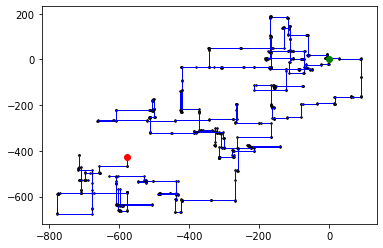

In [111]:
import matplotlib.pyplot as plt

for i in range(1, len(locs)):
    plt.plot(xlocs[i-1:i+1], ylocs[i-1:i+1], 'b-', linewidth=1)
    plt.plot(xlocs[i], ylocs[i], 'k.', markersize=3)
plt.plot(xlocs[0], ylocs[0], 'g.', markersize=12)
plt.plot(xlocs[-1], ylocs[-1], 'r.', markersize=12)
plt.show()

<a class="anchor" id="day13"></a>

# Day 13

*Part 1*  
What is the ID of the earliest bus you can take to the airport multiplied by the number of minutes you'll need to wait for that bus?

*Part 2*  


In [113]:
with open('data2020/day13.txt') as f13:
    notes = [row.strip() for row in f13.readlines()]
    
notes

['1000104',
 '41,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,37,x,x,x,x,x,659,x,x,x,x,x,x,x,23,x,x,x,x,13,x,x,x,x,x,19,x,x,x,x,x,x,x,x,x,29,x,937,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,17']

In [114]:
# earliest timestamp and buses
et = int(notes[0])
buses = notes[1].split(',')

**Part 1**

In [115]:
active_buses = [int(bus) for bus in buses if bus != 'x']

close_times = [(bus, (et//bus + 1)*bus) for bus in active_buses]
close_times.sort(key=lambda x: x[1])

In [116]:
best = close_times[0]
best[0]*(best[1] - et)

115

**Part 2**

<a class="anchor" id="day14"></a>

# Day 14

*Part 1*  
Given is a list of masks and values to write to locations in memory. Line by line, each time we see a mask, that is the new mask, and that mask will overwrite the 36-bit binary version of the value being assigned to memory. If the mask has a 0 or 1, that is the new bit in the value, it the mask has an X, leave the original bit.

After masking all the values and assigning them to memory, what is the sum of all values assigned to memory?

*Part 2*  
Now, the masks are modifying the locations in memory, not the values.

    0: leave that bit alone
    1: change the mem bit to 1
    X: leave as X, can take on either 0 or 1, all possible combos of mem address should take on the new val
    Example
    mask = 000000000000000000000000000000X1001X
    mem[42] = 100
    mask = 00000000000000000000000000000000X0XX
    mem[26] = 1

    should give answer of 208
    
In the first mem write above, mask has 2 X's, so there are 4 possible combos the X's could take on (00, 01, 10, 11), and we want to write the value of 100 to all 4 of them. The second write has a mask with 3 X's, so there are 8 different locations we'll write the value of 1 to memory.

In [118]:
with open('data2020/day14.txt') as f14:
    prog = [row.strip() for row in f14.readlines()]
    
prog[-5:]

['mem[59783] = 121082',
 'mem[56918] = 1237706',
 'mem[32355] = 472',
 'mem[44080] = 131839645',
 'mem[56680] = 38523']

**Part 1**

In [119]:
def applyMask(mask, val):
    newVal = bin(val)[2:]  # convert to binary
    newVal = '0'*(36-len(newVal)) + newVal   # add leading 0s
    maskedVal = ''.join([newVal[i] if mask[i] == 'X' else mask[i] for i in range(36)])   # apply the mask
    return int(maskedVal, 2)  # return the base_10 value to be written to memory

applyMask('XXXXXXXXXXXXXXXXXXXXXXXXXXXXX1XXXX0X', 0)

64

In [120]:
known = {}
for i, line in enumerate(prog):
    if line[:4] == 'mask':
        mask = line.split(' = ')[1]
    else:
        loc, val = line.split(' = ')
        loc = int(loc[4:-1])
        val = int(val)
        newVal = applyMask(mask, val)
        known[loc] = newVal
        
sum(known.values())

6559449933360

**Part 2**

In [121]:
def applyMask2(mask, memloc):
    # convert loc to binary with leading 0s
    loc = bin(memloc)[2:]
    loc = '0'*(36-len(loc)) + loc
    
    # apply mask to the loc, leaving in Xs
    maskedloc = ''
    for i in range(36):
        curr = mask[i]
        if curr == '0':
            maskedloc += loc[i]
        elif curr == '1':
            maskedloc += '1'
        else:
            maskedloc += 'X'
            
    # get all possible locs (all binary combos possible for Xs)
    locs = []
    xcount = maskedloc.count('X')
    for i in range(2**xcount):
        ml = maskedloc[:]  # make a copy of masked loc so we can modify it
        insert = bin(i)[2:]  # create binary string of vals to be inserted
        insert = '0'*(xcount-len(insert)) + insert  # add leading zeros
        for j in range(len(insert)):
            ml = ml.replace('X', insert[j], 1)  # replace Xs one at a time
        locs.append(int(ml, 2))
        
    # return the list of locations in memory we need to write to
    return list(set(locs))

applyMask2('X000000000000000000000000000000000000', 42)

[42, 34359738410]

In [123]:
def getAnswer(data):
    known2 = {}
    for i, line in enumerate(data):
        if line[:4] == 'mask':
            mask = line.split(' = ')[1]
        else:
            loc, val = line.split(' = ')
            loc = int(loc[4:-1])
            val = int(val)
            newlocs = applyMask2(mask, loc)
            #print(newlocs)
            for nl in newlocs:
                known2[nl] = val
    return sum(known2.values())

getAnswer(prog)

3369767240513

<a class="anchor" id="day15"></a>

# Day 15

Playing a memory game with the elves.

*Part 1*

In this game, the players take turns saying numbers. They begin by taking turns reading from a list of starting numbers (your puzzle input). Then, each turn consists of considering the most recently spoken number:

If that was the first time the number has been spoken, the current player says 0.  
Otherwise, the number had been spoken before; the current player announces how many turns apart the number is from when it was previously spoken.

Given the starting numbers (input), what is the 2020th number spoken?

(This sequence is in the OEIS:  https://oeis.org/A181391)

*Part 2*  
(Lame) Instead, find the 30,000,000th value


In [124]:
# my problem input
data1 = [8,0,17,4,1,12]

**Part 1**

In [125]:
def findnth(n, data):
    # initialize a dict to hold indices we've seen each val
    # since 0 is special, need a starter for it
    locs = {0:[]}
    
    # put initial numbers in dict
    for i, val in enumerate(data):
        locs[val] = [i]
    
    # If we've only seen the number once before, that means it 
    #  was the most recent number, so go with a 0 next.
    # If we've seen the number before, find distance from one
    #  number ago (i-1) and prev occurrance before that ([-2]),
    #  two occurrences ago.
    
    last = data[-1]
    i = len(data)
    while i < n:
        if len(locs[last]) == 1:
            last = 0
            locs[0].append(i)
        else:
            last = i - 1 - locs[last][-2] # last = dist here
            if last not in locs:
                locs[last] = [i]
            else:
                locs[last].append(i)
        i += 1
    return last
        

In [126]:
# sample data should give 1836
data2 = [3, 1, 2]
findnth(2020, data2)

1836

In [127]:
findnth(2020, data1)

981

**Part 2**

In [128]:
findnth(30000000, data1)

164878

<a class="anchor" id="day16"></a>

# Day 16

You can't read your train ticket, but you know what the 20 field represent, and you know what values are valid for the fields.

*Part 1*  
Determine the sum of all values on all scanned tickets that don't match any field (class).

*Part 2*  
Now, remove all the invalid tickets, and use the valid tickets to determine which values correspond to which fields. All the tickets have the same order, including mine, so for example, perhaps the 3rd value on every ticket indicates the price. Determine in which order the values on each ticket correspond to the available fields. Then, find the product of the 6 "departure" values on your ticket (first 6).

In [130]:
with open('data2020/day16.txt') as f16:
    info = [row.strip() for row in f16.readlines()]
    
info[:30]

['departure location: 32-209 or 234-963',
 'departure station: 47-64 or 83-967',
 'departure platform: 37-609 or 628-970',
 'departure track: 29-546 or 567-971',
 'departure date: 50-795 or 816-960',
 'departure time: 49-736 or 750-962',
 'arrival location: 48-399 or 420-967',
 'arrival station: 49-353 or 360-967',
 'arrival platform: 37-275 or 298-969',
 'arrival track: 40-119 or 127-954',
 'class: 35-750 or 760-968',
 'duration: 43-162 or 186-963',
 'price: 30-889 or 914-949',
 'route: 39-266 or 274-950',
 'row: 45-366 or 389-954',
 'seat: 42-765 or 772-955',
 'train: 30-494 or 518-957',
 'type: 48-822 or 835-973',
 'wagon: 32-330 or 342-951',
 'zone: 36-455 or 462-973',
 '',
 'your ticket:',
 '109,137,131,157,191,103,127,53,107,151,61,59,139,83,101,149,89,193,113,97',
 '',
 'nearby tickets:',
 '141,889,637,661,351,108,544,424,330,479,662,448,152,584,408,736,714,299,61,864',
 '692,855,843,361,21,265,678,716,347,531,56,792,492,656,727,848,149,596,887,862',
 '819,139,202,774,606,242,64

**Part 1**

In [131]:
# get class intervals
i = 0
classes = []
while info[i] != '':
    line = info[i]
    int1, int2 = line[line.index(':')+1:].split(' or ')
    classes.append(([int(x) for x in int1.split('-')], [int(x) for x in int2.split('-')]))
    i += 1
i += 2

# get my ticket information
myticket = [int(x) for x in info[i].split(',')]
print(myticket)
i += 3

# get scanned ticket information
tickets = []
while i < len(info):
    tickets.append([int(x) for x in info[i].split(',')])
    i += 1

[109, 137, 131, 157, 191, 103, 127, 53, 107, 151, 61, 59, 139, 83, 101, 149, 89, 193, 113, 97]


In [132]:
classes[:5]

[([32, 209], [234, 963]),
 ([47, 64], [83, 967]),
 ([37, 609], [628, 970]),
 ([29, 546], [567, 971]),
 ([50, 795], [816, 960])]

In [133]:
# flatten the classes for this part, ticket vals need to match any class
allclasses = [classes[j][i] for j in range(len(classes)) for i in range(2)]
allclasses[:5]

[[32, 209], [234, 963], [47, 64], [83, 967], [37, 609]]

In [134]:
err = 0
for t in tickets:
    for val in t:
        if any([c[0] <= val and c[1] >= val for c in allclasses]):
            continue
        else:
            err += val
err

19060

**Part 2**

In [135]:
# remove invalid
bad = []
for t in tickets:
    for val in t:
        if any([c[0] <= val and c[1] >= val for c in allclasses]):
            continue
        else:
            bad.append(t)
goodtix = [t for t in tickets if t not in bad]

In [136]:
avail = classes[:]   # copy classes to avail so we can modify it
order = {}
unclaimed = list(range(len(goodtix[0])))   # ticket indices we haven't matched yet

while unclaimed:
    for i in unclaimed:
        vals = [t[i] for t in goodtix]   # get i_th val from every ticket
        goodavailind = []
        for aind, a in enumerate(avail):
            if all([(a[0][0] <= v <= a[0][1]) or (a[1][0] <= v <= a[1][1]) for v in vals]):
                goodavailind.append(aind)
        if len(goodavailind) == 1:   # only want to claim a match if its the only possible match
            aind = goodavailind[0]
            order[aind] = i   # put match in final dict
            avail[aind] = [[-1,-1],[-1,-1]]   # prevent this class from being matched again
            unclaimed.remove(i)   # prevent the i_th val on each tix from being checked again
            break
order

{14: 7,
 8: 10,
 10: 15,
 17: 6,
 19: 12,
 7: 1,
 1: 11,
 2: 17,
 0: 5,
 4: 14,
 5: 13,
 3: 19,
 13: 18,
 16: 16,
 15: 3,
 6: 0,
 12: 9,
 18: 2,
 9: 4,
 11: 8}

In [137]:
ans = 1
for i in range(6):
    ans *= myticket[order[i]]
ans

953713095011

<a class="anchor" id="day17"></a>

# Day 17

<a class="anchor" id="day18"></a>

# Day 18

<a class="anchor" id="day19"></a>

# Day 19

<a class="anchor" id="day20"></a>

# Day 20

<a class="anchor" id="day21"></a>

# Day 21

<a class="anchor" id="day22"></a>

# Day 22

<a class="anchor" id="day23"></a>

# Day 23

<a class="anchor" id="day24"></a>

# Day 24

<a class="anchor" id="day25"></a>

# Day 25